In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import cv2

In [4]:
from tqdm import tqdm
import os
import seaborn as sns
sns.set(style="whitegrid")
import glob as gb

In [5]:
trainpath = 'J:/Data science/data/DL/seg_data/seg_train/'
testpath = 'J:/Data science/data/DL/seg_data/seg_test/'
predpath = 'J:/Data science/data/DL/seg_data/seg_pred/'

In [6]:
for folder in  os.listdir(trainpath + 'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 511 in folder buildings
For training data , found 2271 in folder forest
For training data , found 2404 in folder glacier
For training data , found 2512 in folder mountain
For training data , found 2274 in folder sea
For training data , found 2382 in folder street


In [7]:
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 437 in folder buildings
For testing data , found 474 in folder forest
For testing data , found 553 in folder glacier
For testing data , found 525 in folder mountain
For testing data , found 510 in folder sea
For testing data , found 501 in folder street


In [8]:
files = gb.glob(pathname= str(predpath +'seg_pred/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 596


In [9]:
code = {'buildings':0 , 'forest':1 , 'glacier':2 , 'mountain':3 , 'sea':4 , 'street':5}
code

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [10]:
def getcode(n):
    for x,y in code.items():
        if n==y:
            return x

In [11]:
size = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    12307
(113, 150, 3)        7
(111, 150, 3)        3
(135, 150, 3)        3
(144, 150, 3)        2
(123, 150, 3)        2
(134, 150, 3)        2
(146, 150, 3)        2
(143, 150, 3)        2
(142, 150, 3)        2
(108, 150, 3)        2
(136, 150, 3)        2
(120, 150, 3)        1
(131, 150, 3)        1
(147, 150, 3)        1
(81, 150, 3)         1
(145, 150, 3)        1
(141, 150, 3)        1
(100, 150, 3)        1
(103, 150, 3)        1
(97, 150, 3)         1
(149, 150, 3)        1
(76, 150, 3)         1
(102, 150, 3)        1
(119, 150, 3)        1
(133, 150, 3)        1
(115, 150, 3)        1
(110, 150, 3)        1
(105, 150, 3)        1
(140, 150, 3)        1
dtype: int64

In [12]:
size = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    2993
(141, 150, 3)       1
(110, 150, 3)       1
(76, 150, 3)        1
(149, 150, 3)       1
(72, 150, 3)        1
(131, 150, 3)       1
(81, 150, 3)        1
dtype: int64

In [13]:
size = []
files = gb.glob(pathname= str(predpath +'seg_pred/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    596
dtype: int64

In [14]:
s = 100

In [15]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [16]:
len(X_train)

12354

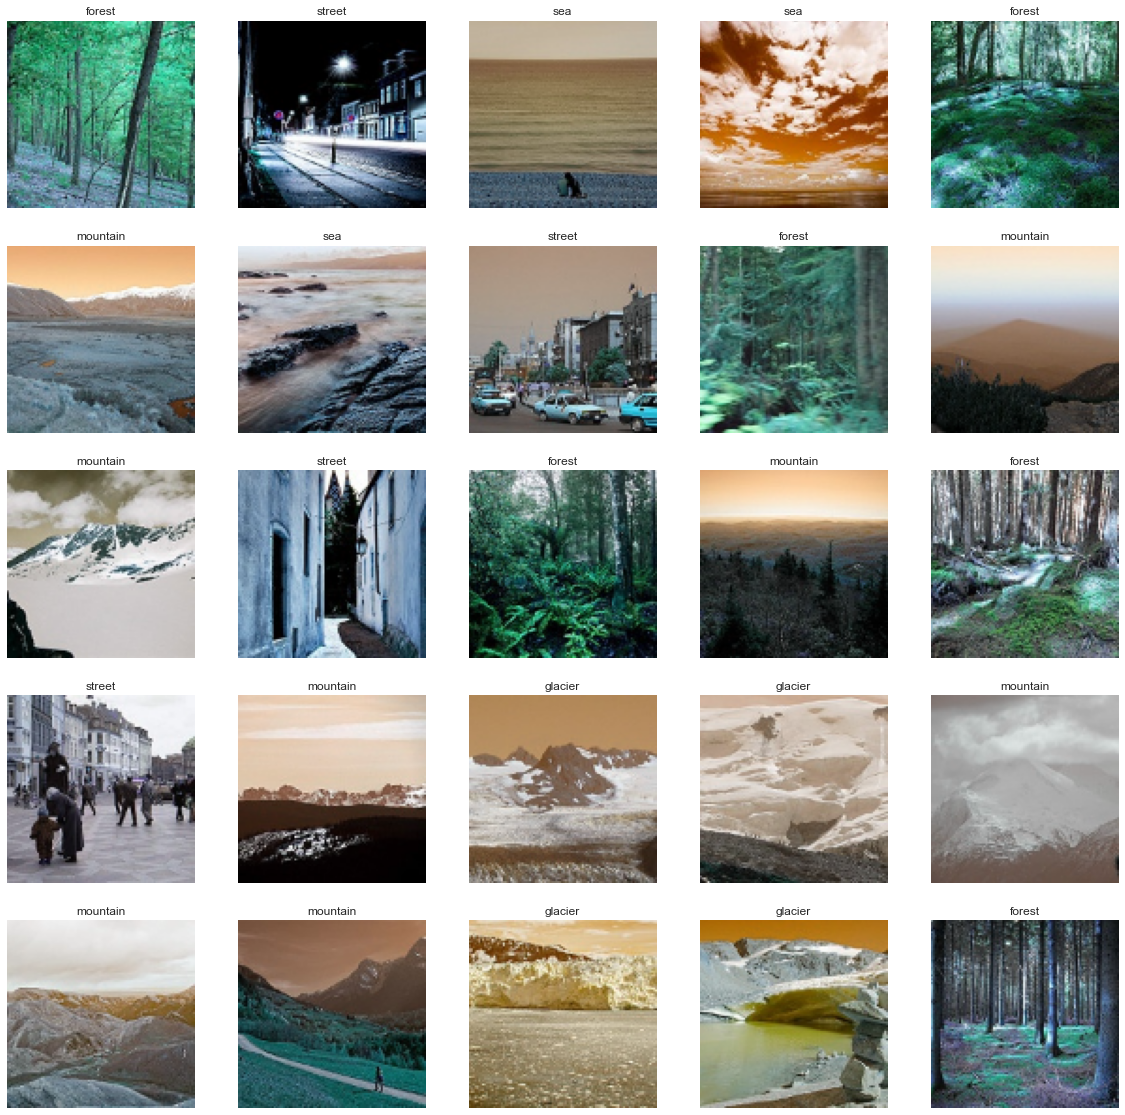

In [17]:
plt.figure(figsize=(20,20))
for n,i in enumerate(list(np.random.randint(0,len(X_train),25))):
    plt.subplot(5,5,n+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [ ]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str(testpath + 'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])
        

In [ ]:
print(f'we have {len(X_test)} items in X_test')

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [ ]:
X_pred = []
files = gb.glob(pathname= str(predpath + 'seg_pred/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))       

In [ ]:
print(f'we have {len(X_pred)} items in X_pred')

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

In [ ]:
x_train = np.array(X_train)
x_test = np.array(X_test)
x_pred = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
print(f'x_train shape  is {x_train.shape}')
print(f'x_test shape  is {x_test.shape}')
print(f'x_pred shape  is {x_pred.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

In [ ]:
import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(s,s,3)),
    keras.layers.Conv2D(200,kernel_size=(3,3) ,activation='relu'),
    keras.layers.Conv2D(150,kernel_size=(3,3) , activation='relu'),
    keras.layers.MaxPool2D(4,4),
    keras.layers.Conv2D(80,kernel_size=(3,3) ,activation='relu'),
    keras.layers.Conv2D(50,kernel_size=(3,3) , activation='relu'),
    keras.layers.MaxPool2D(4,4),
    keras.layers.Flatten(),
    keras.layers.Dense(120,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(6,activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model_history = model.fit(x_train,y_train,epochs=3,batch_size=64,verbose=1)
model_history